<a href="https://colab.research.google.com/github/Vlasovets/Deep_learning_course_assistantship/blob/master/Fitts_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced topics in User Interfaces

## 🧐 **Learning goals** 
The tutorial covers the topics explained during the lecture in the following parts:
1.   to continue with sequence classification with RNNs
2.   to get introduced with one-hot encoding
3.   to train and test models on the given sample of text
4.   to work with different parameters of the model

## 🔑1. Introduction

### 💻 Fitts's law

In this exercise, we are going to use the key concept from human-interaction  theory - the [Fitts's](https://en.wikipedia.org/wiki/Fitts%27s_law) law.

🤓 ~~Dry~~ theory:

Fitts’ law states that the amount of time required for a person to move a pointer (e.g., mouse cursor) to a target area is a function of the distance to the target divided by the size of the target. Thus, the longer the distance and the smaller the target’s size, the longer it takes.

⛔ It is important to mention that constants are always picked manually in the formula below since the problem of computing all possible combinations is [NP-hard](https://en.wikipedia.org/wiki/NP-hardness).

🧐 Minute of history:

In 1954, psychologist Paul Fitts, examining the human motor system, showed that the time required to move to a target depends on the distance to it, yet relates inversely to its size. By his law, fast movements and small targets result in greater error rates, due to the speed-accuracy trade-off. Although multiple variants of Fitts’ law exist, all encompass this idea.

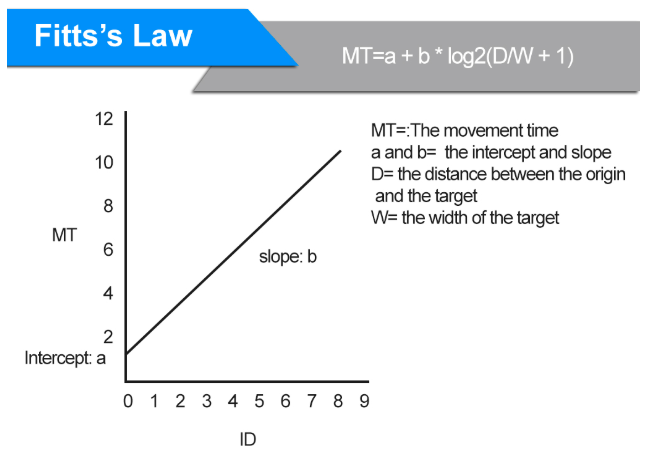

In [13]:
Image(filename='fitts_law.PNG')

Some information on [Callbacks](https://keras.io/callbacks/) in Keras.

In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import TensorBoard, EarlyStopping

🚩 The data contains four key features:
* the distance between different points on the screen
* width of the screen
* id
* transition time from one point to another

In [0]:
def load_dataset(filename):
    X, y = [], []
    with open(filename) as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=' ')
        for row in csv_reader:
            w, d, t = int(row['width']), int(row['distance']), float(row['time'])
            X.append([w, d])
            y.append(t)
    X, y = np.array(X), np.array(y)
    return X, y

## ⚡2. Model Training

A neural network with a linear activation function is simply a linear regression model. It has limited power and the ability to handle complexity varying parameters of input data. It takes the inputs, multiplied by the weights for each neuron, and creates an output signal proportional to the input. In one sense, a linear function is better than a step function because it allows multiple outputs, not just yes and no.

However, a linear activation function has two major problems:

1. Not possible to use [backpropagation](https://en.wikipedia.org/wiki/Backpropagation)  (gradient descent) to train the model—the derivative of the function is a constant, and has no relation to the input. So it’s not possible to go back and understand which weights in the input neurons can provide a better prediction.
  
2. All layers of the neural network collapse into one—with linear activation functions, no matter how many layers in the neural network, the last layer will be a linear function of the first layer (because a linear combination of linear functions is still a linear function). So a linear activation function turns the neural network into just one layer.

🔔You are encouraged to propose another activation function to get additional points for this exercise.


Here, we use *optimizer='rmsprop'*, but you can try [more](https://keras.io/optimizers/#rmsprop) and compare the results to get additional points.


The MSE, MAE (also RMSE and R-Squared) metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

* <font color=lightgreen>MAE</font> (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

* <font color=lightblue>MSE</font> (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.


In [15]:
Image(url='https://econbrowser.com/wp-content/uploads/2019/07/msemae.png')

In [0]:
def create_model(dim):
    model = Sequential()
    model.add(Dense(dim, activation="relu", input_dim=dim))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae', 'mse'])
    return model

In [27]:
if __name__ == '__main__':
    # The saved model file will be named like the dataset file.
    dataset_file = 'fitts-gen.csv'

    X, y = load_dataset(dataset_file)

    # Create partitions.
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

    # Set callbacks, for monitoring progress.
    cb_tensorboard = TensorBoard(log_dir='/tmp/fitts_logs')
    cb_earlystopping = EarlyStopping(patience=20)

    # Train the model.
    model = create_model(X_train.shape[1])
    print(model.summary())
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        callbacks=[cb_tensorboard, cb_earlystopping]
    )

    # Evaluate the model.
    loss, mae, mse = model.evaluate(X_test, y_test)
    print('MAE: {:.2f}, MSE: {:.2f}'.format(mae, mse))

    # Save the model.
    model.save('{}.h5'.format(dataset_file))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 1s 2ms/sample - loss: 135058.6731 - mean_absolute_error: 336.4579 - mean_squared_error: 135058.6875 - val_loss: 109155.1087 - val_mean_absolute_error: 307.8007 - val_mean_squared_error: 109155.1094
Epoch 2/100
400/400 [==============================] - 0s 101us/sample - loss: 133185.2925 - mean_absolute_error: 333.6899 - mean_squared_e

## 💎 3. Model testing

<font color=yellow>R-Squared</font> (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. Usually, the value from 0 to 1 if there no additional constraints. The higher the value is, the better the model is. You can see an adjusted version of R-Squared in the Figure below.

In [16]:
Image(url='https://i.stack.imgur.com/xb1VY.png')

[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) transforms features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one. You will find a simple example of using this technique below.

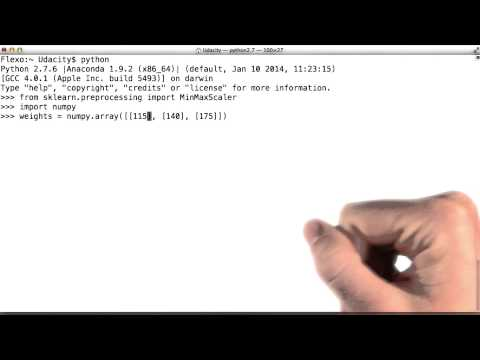

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo('lgoh5R05YM0')

You can uncomment 8th line if you store the model in a separate file.

In [0]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.python.keras.models import load_model
#from fitts_train import load_dataset

R-squared: -0.5389833534403436


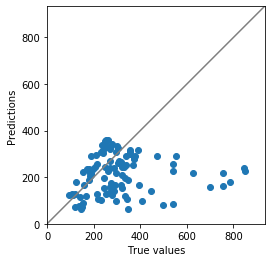

In [32]:
dataset_file = 'fitts-gen.csv'
X, y = load_dataset(dataset_file)

# Create partitions.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

model = load_model('{}.h5'.format(dataset_file), compile=False)
y_pred = model.predict(X_test)

# Evaluate the quality of the fit.
print('R-squared:', r2_score(y_test, y_pred))

# Plot predictions against ground-truth.
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.axis('square')
# Add some padding to the plot so that all the data can fit in well.
max_val = 1.1 * max(y_test.max(), y_pred.max())
plt.xlim([0, max_val])
plt.ylim([0, max_val])
# Add a diagonal line to appreciate better the predictions.
plt.plot([0, max_val], [0, max_val], color='gray')
plt.scatter(y_test, y_pred)
# Save as PNG file and display plot.
plt.savefig('{}.png'.format(dataset_file))
plt.show()

🆘 As you can see R-Squared is negative. You might wonder at this point, how it can be negative?

In fact, R-Squared compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R-Squared is negative. Note that R-Squared is not always the square of anything, so it can have a negative value without violating any rules of math. R-Squared is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

💡 To sum up, a <font color=red>negative R-Squared</font> is not a mathematical impossibility or the sign of a bug. It simply means that the chosen model (with its constraints) fits the data really poorly.

## 🏁 5. Conclusion

Now, you know:

1.   how to apply linear model according to Fitt's law
2.   how to scale the data using MinMaxScaler from Sk-learn
3.   how to use different regression metrics and how to interpret them
3.   to work with different parameters of the model

Do not hesitate to ask questions at otorrent@mail.ru

Thank you for your attention and see you next exercise session!
